In [1]:
import contextily as cx
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import folium


In [2]:

brownfields = pd.read_csv("Brownfields.csv")
brownfields.dropna(subset=['Latitude', 'Longitude'], inplace=True)
brownfields.fillna(value="None", inplace=True)

gpd_file = gpd.read_file("Counties_(v17a)/Counties_(v17a).shp")


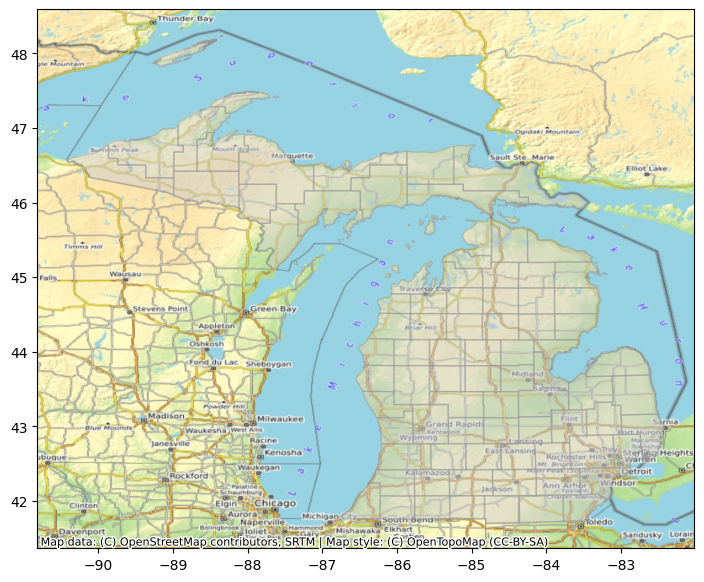

In [3]:

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
gpd_file.plot(ax=ax, facecolor='#cccccc', edgecolor='#969696', alpha=0.5)
px.scatter(brownfields["Longitude"], brownfields["Latitude"])

cx.add_basemap(ax, crs=gpd_file.crs, source=cx.providers.OpenTopoMap)
plt.show()

In [4]:
cx.providers

{'OpenStreetMap': {'Mapnik': {'url': 'https://tile.openstreetmap.org/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.Mapnik'},
  'DE': {'url': 'https://tile.openstreetmap.de/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.DE'},
  'CH': {'url': 'https://tile.osm.ch/switzerland/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'bounds': [[45, 5], [48, 11]],
   'name': 'OpenStreetMap.CH'},
  'France': {'url': 'https://{s}.tile.openstreetmap.fr/osmfr/{z}/{x}/{y}.png',
   'max_zoom': 20,
   'html_attribution': '&copy; OpenStreetMap France | &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap France | (C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.France'},
  'HOT': {'url': 'https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles style by <a href="https://www.hotosm.org/" target="_blank">Humanitarian OpenStreetMap Team</a> hosted by <a href="https://openstreetmap.fr/" target="_blank">OpenStreetMap France</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team hosted by OpenStreetMap France',
   'name': 'OpenStreetMap.HOT'},
  'BZH': {'url': 'https://tile.openstreetmap.bzh/br/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles courtesy of <a href="http://www.openstreetmap.bzh/" target="_blank">Breton OpenStreetMap Team</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles courtesy of Breton OpenStreetMap Team',
   'bounds': [[46.2, -5.5], [50, 0.7]],
   'name': 'OpenStreetMap.BZH'},
  'BlackAndWhite': {'url': 'http://{s}.tiles.wmflabs.org/bw-mapnik/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'attribution': '(C) OpenStreetMap contributors',
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'name': 'OpenStreetMap.BlackAndWhite'}},
 'MapTilesAPI': {'OSMEnglish': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'en/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMEnglish'},
  'OSMFrancais': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'fr/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMFrancais'},
  'OSMEspagnol': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'es/map/v1',
   'apikey': '<insert 

In [5]:
brownfields.head()

,X,Y,OBJECTID_1,UniqueID,ProjectName,AwardDateYearFunded,City,SiteAddress,County,ParcelTaxID,...,FundingSource,TotalBrownfieldIncentives,F381ApprovedAmount,GrantAwardAmount,LoanAwardAmount,WaterfrontAwardAmount,BrownfieldSiteAssessment,StateFundedCleanupAmountSpent,Acreage,DevelopmentType
0,-85.682008,42.972568,1,2200907018.0,"1 to 3.org, LLC",2009/07/30 00:00:00+00,Grand Rapids,"502 Second Street, NW",Kent,41-13-24-378-001,...,381,29670.0,"$29,670",None,None,0.0,None,0.0,0.23,Transitional City Center
1,-85.669876,42.963482,2,220190310.0,10 Ionia Avenue NW 381 WP,2018/11/30 00:00:00+00,Grand Rapids,10 Ionia Avenue NW,Kent,41-13-25-293-004,...,381,54845.0,"$54,845",None,None,None,None,None,0.229,Commercial
2,-82.420759,42.974632,3,2199607014.0,100 Blk Clyde St,1996/07/16 00:00:00+00,Port Huron,212 Quay Street,SAINT CLAIR,<null>,...,SAF,50000.0,None,"$50,000",None,0.0,None,0.0,1.0,Commercial/Residential
3,-84.484714,42.735953,4,2201707837.0,"100-140 West Grand River Ave, 303 Abbot Road, ...",2017/07/26 00:00:00+00,East Lansing,"100-140 West Grand River Ave, 303 Abbot Road, ...",Ingham,33-20-01-13-230-004,...,381,114425.0,"$114,425.00",None,None,None,None,None,3.0,None
4,-85.618556,44.764309,5,2200909022.0,101 N. Park Street (former Bridgestone/Firestone),2009/09/22 00:00:00+00,Traverse City,101 N. Park Street (former 247 & 251 E. Front ...,Grand Traverse,28-51-69801210,...,381,122274.0,"$122,274",None,None,0.0,None,0.0,0.32,Commercial C-4b


In [6]:
map = folium.Map(location=[44.75, -85], zoom_start=7, control_scale=True)

In [7]:
for index, location_info in brownfields.iterrows():
    html=f"""
    <h4>Project Name: {location_info['ProjectName']}</h4>
    <p style="font-size:50%;">Development Type: {location_info["DevelopmentType"]}</p>
    <p style="font-size:50%;">Total Brownfield Incentives: {location_info["TotalBrownfieldIncentives"]}</p>
    <p style="font-size:50%;">Acreage: {location_info["Acreage"]}</p>

    """    

    iframe = folium.IFrame(html=html, width=200, height=200)
    popup = folium.Popup(iframe, max_width=1000)

    folium.Marker([location_info["Latitude"], location_info["Longitude"]], popup=popup).add_to(map)

In [8]:
folium.raster_layers.ImageOverlay(
    image="mi_map.png",
    name="Michigan County Map",
    bounds=[[41.7, -90.5], [47.45, -82.4]],
    opacity=1,
    interactive=False,
    cross_origin=False,
    zindex=1,
    alt="mi-map.png",
).add_to(map)

folium.LayerControl().add_to(map)

In [9]:
# m = folium.Map([43, -100], zoom_start=4)

# url = "https://gist.githubusercontent.com/vitalii-z8i/bbb96d55d57f1e4342c3408e7286d3f2/raw/3b9b1fba8b226359d5a025221bb2688e9807c674/counties_list.json"

# folium.GeoJson(url).add_to(m)

# m


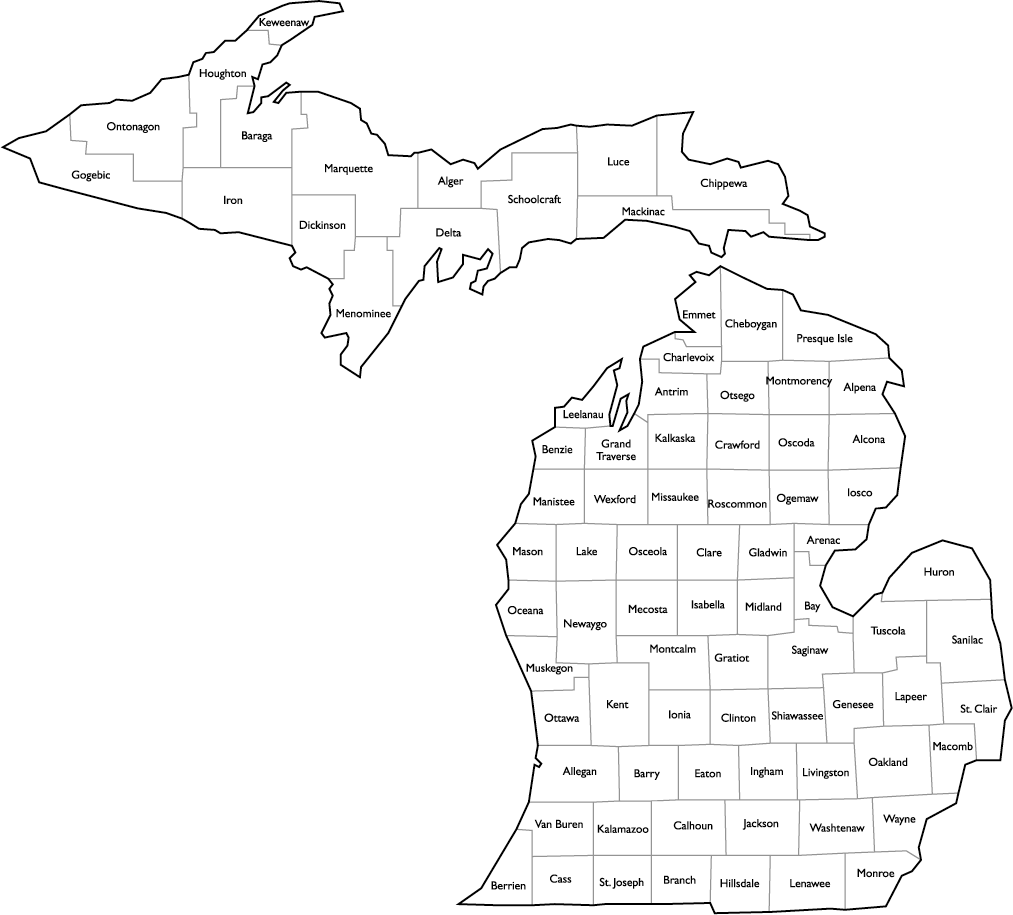

In [10]:
map

In [11]:
brownfields["County"].str.capitalize().value_counts()

County
Wayne             179
Oakland            67
Kent               61
Grand traverse     49
Kalamazoo          41
                 ... 
Montmorency         1
Jackson             1
Iron                1
Charlevoix          1
Benzie              1
Name: count, Length: 89, dtype: int64

In [12]:
brownfields["County"] = brownfields["County"].str.title().str.strip()
brownfields["County"].replace("Genessee", "Genesee", inplace=True)
brownfields["County"].replace("Houghton/ Keweenaw", "Houghton", inplace=True)
brownfields["County"].replace("Safinaw", "Saginaw", inplace=True)
brownfields["County"].replace("St.", "Saint", regex=True, inplace=True)

In [13]:
a = brownfields.columns[5:]
a.drop(["Latitude", "Longitude"])

Index(['AwardDateYearFunded', 'City', 'SiteAddress', 'County', 'ParcelTaxID',
       'FundingSource', 'TotalBrownfieldIncentives', 'F381ApprovedAmount',
       'GrantAwardAmount', 'LoanAwardAmount', 'WaterfrontAwardAmount',
       'BrownfieldSiteAssessment', 'StateFundedCleanupAmountSpent', 'Acreage',
       'DevelopmentType'],
      dtype='object')

In [49]:
# (pd.to_numeric(brownfields["LoanAwardAmount"].str.replace('$', '').str.replace(",","").str.strip(), errors='coerce'))
# pd.to_numeric(brownfields["LoanAwardAmount"].str.replace('$', '').str.replace(",","").str.strip().unique(), errors="coerce")
import numpy as np
np.nanmax(list(pd.to_numeric(brownfields["TotalBrownfieldIncentives"].str.replace('$', '').str.replace(",","").str.strip().unique(), errors='coerce')))


/var/folders/p_/2j3j3pp93175gydc37vsk5nh0000gn/T/ipykernel_45159/1762110082.py:4: RuntimeWarning:

All-NaN axis encountered



nan

In [53]:
pd.to_numeric(brownfields["TotalBrownfieldIncentives"].str.strip(), errors='coerce')

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1066   NaN
1067   NaN
1068   NaN
1069   NaN
1070   NaN
Name: TotalBrownfieldIncentives, Length: 1069, dtype: float64

In [14]:
brownfields.head()

,X,Y,OBJECTID_1,UniqueID,ProjectName,AwardDateYearFunded,City,SiteAddress,County,ParcelTaxID,...,FundingSource,TotalBrownfieldIncentives,F381ApprovedAmount,GrantAwardAmount,LoanAwardAmount,WaterfrontAwardAmount,BrownfieldSiteAssessment,StateFundedCleanupAmountSpent,Acreage,DevelopmentType
0,-85.682008,42.972568,1,2200907018.0,"1 to 3.org, LLC",2009/07/30 00:00:00+00,Grand Rapids,"502 Second Street, NW",Kent,41-13-24-378-001,...,381,29670.0,"$29,670",None,None,0.0,None,0.0,0.23,Transitional City Center
1,-85.669876,42.963482,2,220190310.0,10 Ionia Avenue NW 381 WP,2018/11/30 00:00:00+00,Grand Rapids,10 Ionia Avenue NW,Kent,41-13-25-293-004,...,381,54845.0,"$54,845",None,None,None,None,None,0.229,Commercial
2,-82.420759,42.974632,3,2199607014.0,100 Blk Clyde St,1996/07/16 00:00:00+00,Port Huron,212 Quay Street,Saint Clair,<null>,...,SAF,50000.0,None,"$50,000",None,0.0,None,0.0,1.0,Commercial/Residential
3,-84.484714,42.735953,4,2201707837.0,"100-140 West Grand River Ave, 303 Abbot Road, ...",2017/07/26 00:00:00+00,East Lansing,"100-140 West Grand River Ave, 303 Abbot Road, ...",Ingham,33-20-01-13-230-004,...,381,114425.0,"$114,425.00",None,None,None,None,None,3.0,None
4,-85.618556,44.764309,5,2200909022.0,101 N. Park Street (former Bridgestone/Firestone),2009/09/22 00:00:00+00,Traverse City,101 N. Park Street (former 247 & 251 E. Front ...,Grand Traverse,28-51-69801210,...,381,122274.0,"$122,274",None,None,0.0,None,0.0,0.32,Commercial C-4b


In [42]:
pd.to_numeric(brownfields["LoanAwardAmount"].str.replace('$', '').str.replace(",","").str.strip().unique(), errors="coerce")

array([          nan, 1.9393500e+05, 1.5400000e+05, 1.0000000e+06,
       1.3800000e+05, 7.5000000e+04, 2.0895500e+05, 1.2963600e+05,
       1.2963600e+05, 3.0000000e+05, 1.8469000e+05, 1.2700000e+05,
       1.4332400e+05, 2.6714000e+05, 7.5000000e+05, 1.5000000e+06,
       7.3464800e+05, 2.8002500e+05, 2.5000000e+05, 6.2500000e+05,
       1.0000000e+06, 1.5000000e+05, 2.3100000e+05, 5.7275000e+05,
       2.5000000e+05, 4.9255000e+05, 2.0000000e+06, 4.5000000e+05,
       1.1246500e+05, 5.0000000e+04, 2.9500000e+05, 3.7600000e+05,
       5.0000000e+05, 8.0000000e+04, 1.7500000e+05, 8.5000000e+05,
       3.6100000e+05, 1.4632820e+06, 4.2500000e+05, 4.2500000e+05,
       2.8000000e+05, 5.4100000e+05, 1.1931250e+06, 3.1900000e+05,
       4.0000000e+05, 8.0000000e+05, 5.6683500e+05, 5.6683500e+05,
       9.4400000e+05, 3.2500000e+05, 2.2896500e+05, 2.9296300e+05,
       1.7942500e+05, 2.7887500e+05, 5.0000000e+05, 7.4625000e+04,
       8.5000000e+04, 2.0000000e+04, 1.2700000e+02, 2.9492500e

In [60]:
brownfields = pd.read_csv("Brownfields.csv")
brownfields.dropna(subset=['Latitude', 'Longitude'], inplace=True)
brownfields.fillna(value="None", inplace=True)

for i in brownfields.columns:
    combined = '\t'.join(list(brownfields[i].astype('str')))
    if '$' in combined:
        brownfields[i] = brownfields[i].str.replace("$", "")
    if ',' in combined:
        brownfields[i] = brownfields[i].str.replace(",", "")
    if ' ' in combined:
        brownfields[i] = brownfields[i].str.strip()

brownfields

,X,Y,OBJECTID_1,UniqueID,ProjectName,AwardDateYearFunded,City,SiteAddress,County,ParcelTaxID,...,FundingSource,TotalBrownfieldIncentives,F381ApprovedAmount,GrantAwardAmount,LoanAwardAmount,WaterfrontAwardAmount,BrownfieldSiteAssessment,StateFundedCleanupAmountSpent,Acreage,DevelopmentType
0,-85.682008,42.972568,1,2200907018.0,1 to 3.org LLC,2009/07/30 00:00:00+00,Grand Rapids,502 Second Street NW,Kent,41-13-24-378-001,...,381,29670.0,29670,None,None,0.0,None,0.0,0.23,Transitional City Center
1,-85.669876,42.963482,2,220190310.0,10 Ionia Avenue NW 381 WP,2018/11/30 00:00:00+00,Grand Rapids,10 Ionia Avenue NW,Kent,41-13-25-293-004,...,381,54845.0,54845,None,None,None,None,None,0.229,Commercial
2,-82.420759,42.974632,3,2199607014.0,100 Blk Clyde St,1996/07/16 00:00:00+00,Port Huron,212 Quay Street,SAINT CLAIR,<null>,...,SAF,50000.0,None,50000,None,0.0,None,0.0,1.0,Commercial/Residential
3,-84.484714,42.735953,4,2201707837.0,100-140 West Grand River Ave 303 Abbot Road 31...,2017/07/26 00:00:00+00,East Lansing,100-140 West Grand River Ave 303 Abbot Road 31...,Ingham,33-20-01-13-230-004,...,381,114425.0,114425.00,None,None,None,None,None,3.0,None
4,-85.618556,44.764309,5,2200909022.0,101 N. Park Street (former Bridgestone/Firestone),2009/09/22 00:00:00+00,Traverse City,101 N. Park Street (former 247 & 251 E. Front ...,Grand Traverse,28-51-69801210,...,381,122274.0,122274,None,None,0.0,None,0.0,0.32,Commercial C-4b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,-86.090845,44.621752,1067,None,Benzonia Apts- TriTerra (School to sr living),2022/08/05 00:00:00+00,Benzonia,7040 Severance Street,Benzie,None,...,None,45000.0,None,None,None,None,Yes,None,None,None
1067,-83.654910,41.954670,1068,None,Salenbein Building- Dundee,2022/08/05 00:00:00+00,Dundee,187 West Monroe,Monroe,None,...,None,52944.0,None,None,None,None,Yes,None,None,None
1068,-87.393796,46.570630,1069,None,Marquette North Coast,2022/08/11 00:00:00+00,Marquette,2200 Iron Bay Drive,Marquette,None,...,None,30289.85,None,None,None,None,Yes,None,None,None
1069,-88.454912,47.247407,1070,None,Calumet Electronics,2022/08/11 00:00:00+00,Calumet,25830 Depot St,Houghton,None,...,None,35500.0,None,None,None,None,Yes,None,None,None


In [61]:
brownfields["StateFundedCleanupAmountSpent"].unique()

array([0.0, 'None'], dtype=object)

In [62]:
import math

def roundup(x):
    x_str = str(int(x))
    l = len(x_str)
    exp = l-1
    return int(math.ceil(x / (10**exp))) * 10**exp

In [66]:
roundup(5001)

6000

In [73]:
bfields = brownfields[pd.to_numeric(brownfields['GrantAwardAmount'], errors='coerce').notnull()]
bfields[pd.to_numeric(bfields["GrantAwardAmount"]) > 20050]

,X,Y,OBJECTID_1,UniqueID,ProjectName,AwardDateYearFunded,City,SiteAddress,County,ParcelTaxID,...,FundingSource,TotalBrownfieldIncentives,F381ApprovedAmount,GrantAwardAmount,LoanAwardAmount,WaterfrontAwardAmount,BrownfieldSiteAssessment,StateFundedCleanupAmountSpent,Acreage,DevelopmentType
2,-82.420759,42.974632,3,2199607014.0,100 Blk Clyde St,1996/07/16 00:00:00+00,Port Huron,212 Quay Street,SAINT CLAIR,<null>,...,SAF,50000.0,None,50000,None,0.0,None,0.0,1.0,Commercial/Residential
7,-86.246850,43.235734,8,220190324.0,122 Muskegon Avenue,2019/04/13 00:00:00+00,Muskegon,122 Muskegon Avenue,Muskegon,61-24-205-331-0001-00,...,BRG,50000.0,None,50000,None,None,None,None,0.97,Mixed
10,-84.407199,42.263535,11,2199410004.0,155 Hobart Jackson,1994/10/18 00:00:00+00,Jackson,155 Hobart St,JACKSON,<null>,...,SAF,57750.0,None,57750,None,0.0,None,0.0,3.0,Industrial
17,-83.603644,42.242796,18,2199607016.0,206 N. Grove,1996/07/16 00:00:00+00,Ypsilanti,206 N Grove St,WASHTENAW,<null>,...,SAF,30000.0,None,30000,None,0.0,None,0.0,0.75,Commercial
20,-83.162114,42.454217,21,2199607017.0,21721 Wyoming,1996/07/16 00:00:00+00,Royal Oak,21721 Wyoming Ave,OAKLAND,<null>,...,SAF,28000.0,None,28000,None,0.0,None,0.0,0.0,Commercial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,-85.645158,42.991963,1027,None,1603 Diamond Redevelopment,2022/09/01 00:00:00+00,Grand Rapids,1603 Diamond Avenue Northeast & 1600 Country C...,Kent,None,...,None,430000.0,None,430000,None,None,None,None,1.0,Residential
1027,-85.640021,42.936875,1028,None,Boston Square Together,2022/09/01 00:00:00+00,Grand Rapids,1500 1480 1460 1444 1448 1445 1440 1412 1422 1...,Kent,None,...,None,1000000.0,None,1000000,None,None,None,None,11.275,Residential/Commercial
1028,-83.477641,42.429980,1029,None,Foundry Flask Redevelopment Project,2022/09/01 00:00:00+00,Northville,456 East Cady Street,Wayne,None,...,None,800000.0,None,800000,None,None,None,None,4.72,Mixed Use
1029,-83.114740,42.331770,1030,None,Campbell Wesson Apartments,2022/09/01 00:00:00+00,Detroit,5800 5848 5850 5858 5862 Michigan Avenue & 395...,Wayne,None,...,None,1000000.0,None,1000000,None,None,None,None,1.66,Mixed Use


In [74]:
brownfields["DevelopmentType"].unique()

array(['Transitional City Center', 'Commercial', 'Commercial/Residential',
       'None', 'Commercial C-4b', 'B-2 Community Business District',
       'Major Business District (B5) General Industrial District (M3) General Services District (B6)',
       'Mixed', 'Residential', 'Comm. Education/Rec.', 'Industrial',
       'commercial', 'Commercial/Special Use',
       'C-2 General Commercial District', 'No Development', 'Mixed use',
       'Park/Recreational/Commercial', 'Mixed Use', 'Self Serve Storage',
       'Res./Comm.', 'B4-Business/Residential w/ D-4 overlay district',
       'Not Required', '<null>', 'Mixed Use 2-4 Stories',
       'Mixed residential/commercial', 'planned redevelopment district',
       'C2A - Central Business', 'Mixed Use -commerical & Residential',
       'D2 (Downtown Interface)', 'Park', 'commercial residential',
       'B-2 Local Business', 'B3 - Shopping District', 'C-2 Commercial',
       'Restaurant', 'Unknown', 'Parking Lot', 'Ind. Park/warehouse',
    